In [2869]:

########################### INTELLIGENT TRANSPORTAION SYSTEM USING GENETIC ALGORITHM ########################### 


#AUTHORS : 

#          MIRZA ABDUR RAHMAN (19I-0584) 
#          MUHAMMAD HAMMAD (19I-0446)
#          MUNEEB BHALLI (19I-0591)



# IMPORTING LIBRARIES:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import random
import io
import folium
from dgraph import *
from numpy import random as np_random
from scipy.spatial import distance_matrix
from collections import defaultdict



In [2870]:
#Graph Class taken from : https://www.geeksforgeeks.org/find-paths-given-source-destination/


# This Class is used in creating graph of Our Stations from differnt Cities of Pakistan
class Graph:
 
    def __init__(self, vertices):
        # No. of vertices
        self.V = vertices 
        self.paths = []
        # default dictionary to store graph
        self.graph = defaultdict(list) 
 
    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)
 
    '''A recursive function to print all paths from 'u' to 'd'.
    visited[] keeps track of vertices in current path.
    path[] stores actual vertices and path_index is current
    index in path[]'''
    def printAllPathsUtil(self, u, d, visited, path):

        # Mark the current node as visited and store in path
        visited[u]= True
        path.append(u)

        # If current vertex is same as destination, then print
        # current path[]
        if u == d:
            print (path)
            l2 = path
            self.paths.append(l2.copy())
        else:
            # If current vertex is not destination
            # Recur for all the vertices adjacent to this vertex
            for i in self.graph[u]:
                if visited[i]== False:
                    self.printAllPathsUtil(i, d, visited, path)
                    
        # Remove current vertex from path[] and mark it as unvisited
        path.pop()
        visited[u]= False
 
 
    # Prints all paths from 's' to 'd'
    def printAllPaths(self, s, d):

        # Mark all the vertices as not visited
        visited =[False]*(self.V)

        # Create an array to store paths
        path = []

        # Call the recursive helper function to print all paths
        self.printAllPathsUtil(s, d, visited, path)
        print (path)
  

In [2871]:
# OUR FUNCTIONS WHICH WE USED IN GENTIC ALGORITHM AND DATA PREPROCESSING :



# This function creates map of Stations in different Cites of Pakistan using folium libray.
# We plotted the map using the orignal and actual coordinates(lattidtue m longitudes of Cites of Pakistan)
# HERE WE USED FOLIUM TO CREATE A MAP
# WHICH PLACES THE VALUES IN THE DATASET ON THE MAP
def Create_map(df):
        x  = []
        y = []
        for i in range(8):
                x.append(np_random.uniform(24.86, 34.0, size=1))
                y.append(np_random.uniform(67.01,74.3436,size=1))

        map = folium.Map(location=[df.Lattitude.mean(), df.Longitude.mean()], zoom_start=12,control_scale=True)
        #folium place markers
        for lat, lng, label in zip(df.Lattitude, df.Longitude, df.City):
            folium.Marker(location=[lat, lng], popup=label, marker_color='red').add_to(map)
        display(map)



# HERE WE ARE CREATING OBSTACALES ON OUR MAP :
# THIS IS A BASIC PLOT OF THE POINTS
# plot the lang and lat
def Create_Stations_and_Obstacles(df):

        plt.figure(figsize=(10,10))
        plt.scatter(df.Longitude, df.Lattitude)
        plt.xlabel('Longitude')
        plt.ylabel('Lattitude')

        rectangle = plt.Rectangle((69.05499773,27.30419314), 0.38, 0.95, fc='red',ec="red")
        #use y[1] and x[1] to get the coordinates of the rectangle
        rectangle2 = plt.Rectangle((68.40579368,32.2244921), 0.38,0.95 , fc='red',ec="red")
        #use y[2] and x[2] to get the coordinates of the rectangle
        rectangle3 = plt.Rectangle((73.95673648,30.2707003), 0.38, 0.95, fc='red',ec="red")
        #use y[3] and x[3] to get the coordinates of the rectangle
        rectangle4 = plt.Rectangle((69.65336426,31.05971192), 0.38, 0.95, fc='red',ec="red")
        #use y[4] and x[4] to get the coordinates of the rectangle
        rectangle5 = plt.Rectangle((73.52528668,26.72029817), 0.38, 0.95, fc='red',ec="red")
        #use y[5] and x[5] to get the coordinates of the rectangle
        rectangle6 = plt.Rectangle((72.34731228,31.6979375), 0.38, 0.95, fc='red',ec="red")
        #use y[6] and x[6] to get the coordinates of the rectangle
        rectangle7 = plt.Rectangle((67.32759484,27.59375763), 0.38, 0.95, fc='red',ec="red")
        #use y[7] and x[7] to get the coordinates of the rectangle
        rectangle8 = plt.Rectangle((72.11769889,25.95242895), 0.38, 0.95, fc='red',ec="red")
        #use y[8] and x[8] to get the coordinates of the rectangle

        plt.gca().add_patch(rectangle)
        plt.gca().add_patch(rectangle2)
        plt.gca().add_patch(rectangle3)
        plt.gca().add_patch(rectangle4)
        plt.gca().add_patch(rectangle5)
        plt.gca().add_patch(rectangle6)
        plt.gca().add_patch(rectangle7)
        plt.gca().add_patch(rectangle8)

        plt.axis('scaled')
        plt.show()        





#  WE HAVE CALCULATED THE DISTANCE OF EACH CITY TO EVERY CITY
#  USING THERE LONGITUDES AND LATTIDTUDES
def Calcluate_distance_Matrix(df):
        counter = 0
        distances = []
        cities =[]
        for i in range(len(df)):
            cities.append(df.City[i])
        data = []
        for i in range(len(df)):
            l2 = [df.iloc[i].Longitude, df.iloc[i].Lattitude]
            #print(l2)
            data.append(l2)
        df = pd.DataFrame(data, columns=['xcord', 'ycord'], index=cities)
        dist_m = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
        dist_m.to_csv('dist_m.csv')



# IN THIS FUNCTION WE CALCULATED FITNESS VALUES OF OUR CHROMOSOMES/PATHS
# IN THE POPULATION USING THE WEIGHTS OF THE PATHS
# WE ADDED THE DISTANCE WHICH IS ACTUALLY THE WEIGHT OF EVERY EDGE
# IN THE WAY OF THE PATH STARING FROM SOURCE TO DESTINATION
def Calculate_fitness(distancegraph_list ):
    fitness_list = []
    temp = []
    sum = 0
    for i in range(len(distancegraph_list)):
      for j in range(len(distancegraph_list[i])-1):
        x = distancegraph_list[i][j]
        y = distancegraph_list[i][j+1]
        sum = sum + ist_mat[x][y]
        x =0
        y = 0
      fitness_list.append(sum)
      sum = 0
    return fitness_list  



# CALCUTAING MAX FITNESS FROM THE POPULATION OF CHROMOSOMES/PATHS
# FOR THIS WE FIRST CALCULATED MAX VALUE AND THEN 
# RETURNED THE INDEX OF THAT FROM THE FITNESS LIST
def Calculate_max_fitness(fitness_list):
    max_value = max(fitness_list)
    max_index = fitness_list.index(max_value)
    return max_index




# CALCULATING THE PARENTS FOR CROSS-OVER
# WE HAVE FIRST FIND THE TOP 2 CHROMOSOMES/PATHS HAVING BEST FITNESS
# VALUES AND THEN MADE THEM PARENTS FOR THE CROSS-OVER
def Calculate_Parents(fitness_list):
    min_value = min(fitness_list)
    min_index = fitness_list.index(min_value)

    a = distancegraph.paths[min_index]
    temp_fitness_list = fitness_list
    pre_fitness_list = fitness_list

    temp_fitness_list.remove(min_value)

    second_min_value = min(temp_fitness_list)
    second_min_index = temp_fitness_list.index(second_min_value)

    b = distancegraph.paths[second_min_index]

    temp_fitness_list.insert(0,min_value)

    return a,b



# CALCULATING CROSS-OVER INTERSECTION POINT FOR THE CROSS-OVER
# BETWEEN BEST FIT PARENTS/PATHS
# WE CALCULATED THE INTESECTION POINT BY SELECTING ANY RANDOM
# COMMON POINT BETWEEN THE PARENT CHROMOSOMES IF NOT
# THEN WE SELECTED ANY RANDOM POINT FROM PARENT 1 AS A INTERSECTION POINT
def Calculate_Crossover_Inetersection_Point(a,b):
    parent1 = list(a)
    parent2 = list(b)

    flag = 0
    list1_as_set = set(parent1)
    intersection = list1_as_set.intersection(parent2)

    if intersection != []:
      intersection_as_list = list(intersection)
    else:
      random_intersection_point = random.choice(parent1)
      flag = 1
    if flag ==1:
        final_intersection_point = random_intersection_point
    else:
        final_intersection_point = random.choice(intersection_as_list)
    return final_intersection_point




# WE USED SINGLE-POINT CROSS-OVER TECHINQUE FOR CROSS-OVER
# IN THIS WE CREATED THE NEW CHILD BY SELECTING THE PATH
# OF PARENT 1 UPTO THE INTERSECTION POINT AND THE SELECTED 
# THE REAMINING PART FROM THE SECOND PARENT AFTER THE INTERSECTION POINT
def single_point_crossover(a,b,final_intersection_point):
      parent1 = np.array(a)
      parent2 = np.array(b)
      child1 = np.append(parent1[:final_intersection_point] , parent2[final_intersection_point:])
      child2 = np.append(parent2[:final_intersection_point] , parent1[final_intersection_point:])

      #converting child1 to list
      child1_list = child1.tolist()
      child1_list

      return child1_list





# IN THIS FUNCTION WE HAVE UPDATED THE POPULATION OF CHROMOSOMES/PATHS
# BY INSERTING THE NEW CHILD WHICH WE GOT FROM THE CROSSOVER OF BEST FIT CHROMOSOMES(PARENTS)
# AND EXCLUDED THE CHROMOSCME HAVING THE WORST FITNESS VALUE
def Updating_population(child1_list):
        check = False
        for i in range(len(distancegraph.paths)):
            if child1_list == distancegraph.paths[i]:
                check = True
                break
            else:
                check = False 

        #Updating the population after the Crossover e.g putting new child in population
        if check == False:
            distancegraph.paths[max_index] = child1_list




# THIS FUNCTION IS FOR THE MUTAION OF THE POPULATION
# WE HAVE USED THIS FUNCTION TO DEMONSTRATE THAT IF THE PATH IS 
# VERY AWKWARD AND THERE IS NO CHROMOSOME WHICH HAS AN IMPORATNT FEATURE
# THEN WE MUTATED A CHROMOSOME AND ADDED TO THE POPULATION
def mutation (chromosome):
    mutated_chromosome = chromosome
    mutated_chromosome[1] = random.randint(0,10)
    return mutated_chromosome    





In [2872]:
# READING THE DATA.CSV FILE IN WHICH ALL THE CITIES AND THERE ACTUAL
# LATTITUDES AND LONIGTUDES ARE PRESENT
df = pd.read_csv('data.csv')
df

,City,Lattitude,Longitude
0,Islamabad,33.698900,73.036900
1,Lahore,31.549700,74.343600
2,Karachi,24.860000,67.010000
3,Peshawar,34.000000,71.500000
4,Hyderabad,25.379200,68.368300
5,Jehlum,32.940500,73.727600
6,Multan,30.197800,71.471100
7,Shewa,33.253661,70.496744
8,Quetta,30.179800,66.975000
9,Dera Ismail Khan,31.831832,70.911518


In [2873]:
 # HERE WE CALCULATE THE  min/max lang/lat values
values =(df.Longitude.min(), df.Lattitude.min(), df.Longitude.max(), df.Lattitude.max())


In [2874]:
# CREATING MAP OF THE INITIAL CITES BY USING FOLIUM LIBRARY AND 
# BY CALLING ABOVE CREATE MAP FUNCTION
Create_map(df)


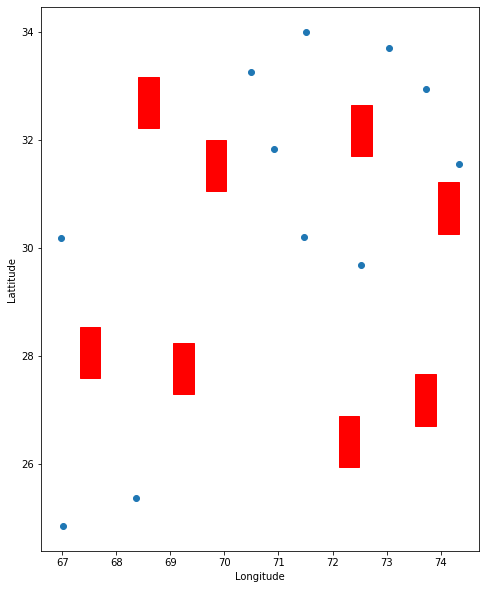

In [2875]:
# STATIONS AND OBSTACLES CREATED BY CALLING THE DESIRED FUNCTION CODDED ABOVE
Create_Stations_and_Obstacles(df)


In [2893]:
#calculated distance between each langitute and lattitude point
#calculated distance between each points and save in array

Calcluate_distance_Matrix(df)



In [2877]:
# CREATED THE ADJENCY MATRIX OF GRAPH CONTAINING CITIES AS POINTS:


# GIVEN NUMBERING TO OUR CITIES :
islamabad = 0
lahore = 1
karachi=2
peshawar=3
hyderabad=4
jhelum=5
multan=6
shewa=7
quetta=8
dera_ismail_khan=9
cholistan=10

#ADJENCY MATRIX :
            #0  1  2  3  4  5  6  7  8  9 10
path_mat = [[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], #1
            [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], #1
            [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #2
            [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], #3
            [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], #4
            [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], #5    
            [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], #6
            [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], #7
            [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], #8
            [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1], #9
            [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]] #10
            

In [2878]:
# CREATED THE INITIAL DISTANCE MATRIX OF THE DISTANCES 
# FROM EVERY CITY TO OTHER CITY WHERE THER IS A PATH IN 
# THE ADJENCY MATRIX :

             #0  1  2  3  4  5  6  7  8  9 10
ist_mat =   [[0, 0, 0, 1.5661, 0, 1.0258, 3.8353, 0, 0, 0, 0],    #0
            [0, 0, 0, 0, 0, 1.5211, 0, 0, 0, 3.4437, 2.6004],     #1
            [0, 0, 0, 0, 1.4541, 0, 0, 0, 5.3199, 0, 0],          #2
            [1.5661, 0, 0, 0, 0, 0, 3.8023, 0, 5.9219, 0, 0],     #3
            [0, 0, 1.4541, 0, 0, 0, 0, 0, 0, 6.9357, 0],          #4
            [1.0258, 1.5211, 0, 0, 0, 0, 3.5516, 0, 0, 0, 0],     #5 
            [3.8353, 0, 0, 3.8023, 0, 3.5516, 0, 3.2074, 0, 0, 0],#6
            [0, 0, 0, 0, 0, 0, 3.2074, 0, 4.6745, 1.4810, 0],     #7
            [0, 0, 5.3199, 5.9219, 0, 0, 0, 4.6745, 0, 0, 0],     #8
            [0, 3.4437, 0, 0, 0, 0, 0, 1.4811, 0, 0, 2.6782],     #9
            [0, 2.6004, 0, 0, 0, 0, 0, 0, 0, 2.6782, 0] ]         #10



In [2879]:
# CREATED THE GRAPH FROM GRAPH CLASS AND ADDED THE EDGES 
# ONLY WHERE THERE IS A PATH IN ADJENCY MATRIX :

# GRAPH CREATION :
distancegraph = Graph(11)  

#ADDING EDGES:
distancegraph.addEdge(0,3)
distancegraph.addEdge(0,5)
distancegraph.addEdge(0,6)
distancegraph.addEdge(1,5)
distancegraph.addEdge(1,9)
distancegraph.addEdge(1,10)
distancegraph.addEdge(2,4)
distancegraph.addEdge(2,8)
distancegraph.addEdge(3,0)
distancegraph.addEdge(3,6)
distancegraph.addEdge(3,8)
distancegraph.addEdge(4,2)
distancegraph.addEdge(4,9)
distancegraph.addEdge(5,0)
distancegraph.addEdge(5,1)
distancegraph.addEdge(5,6)
distancegraph.addEdge(6,0)
distancegraph.addEdge(6,3)
distancegraph.addEdge(6,5)
distancegraph.addEdge(6,7)
distancegraph.addEdge(7,6)
distancegraph.addEdge(7,8)
distancegraph.addEdge(7,9)
distancegraph.addEdge(8,2)
distancegraph.addEdge(8,3)
distancegraph.addEdge(8,7)
distancegraph.addEdge(9,1)
distancegraph.addEdge(9,7)
distancegraph.addEdge(9,10)
distancegraph.addEdge(10,1)
distancegraph.addEdge(10,9)


# GIVING THE INTIAL POINT/SOURCE AND DESTINATION POINT FOR
# APPLYING GENECTIC ALGORITHM TO FIND THE OPTIMAL PATH 
# 0 IS ISLAMABAD
# 3 IS KARACHI
# WE CAN ALSO CHANGE THESE SOURCE AND DESTINATION POINTS

distancegraph.printAllPaths(0,3)

distancegraph.paths

[0, 3]
[0, 5, 1, 9, 7, 6, 3]
[0, 5, 1, 9, 7, 8, 3]
[0, 5, 1, 10, 9, 7, 6, 3]
[0, 5, 1, 10, 9, 7, 8, 3]
[0, 5, 6, 3]
[0, 5, 6, 7, 8, 3]
[0, 6, 3]
[0, 6, 5, 1, 9, 7, 8, 3]
[0, 6, 5, 1, 10, 9, 7, 8, 3]
[0, 6, 7, 8, 3]
[]


[[0, 3],
 [0, 5, 1, 9, 7, 6, 3],
 [0, 5, 1, 9, 7, 8, 3],
 [0, 5, 1, 10, 9, 7, 6, 3],
 [0, 5, 1, 10, 9, 7, 8, 3],
 [0, 5, 6, 3],
 [0, 5, 6, 7, 8, 3],
 [0, 6, 3],
 [0, 6, 5, 1, 9, 7, 8, 3],
 [0, 6, 5, 1, 10, 9, 7, 8, 3],
 [0, 6, 7, 8, 3]]

In [2880]:
# GENETIC ALGORITHM IMPLEMENTATION :
# OUR MAIN GATEWAY :

loop_var = 0
while(loop_var<10):
    distancegraph_list = distancegraph.paths.copy()  # DISTANCE GRAPH GENERATION
    fitness_list = Calculate_fitness(distancegraph_list) # CALCULATING FITNESS 
    if loop_var == 0:
        first_fitness_list = fitness_list.copy()   # SAVING THE FITNESS LIST BEFORE GENETIC ALGORITHM
    max_index = Calculate_max_fitness(fitness_list)  #CALCLUATING MAX FINESS
    a,b = Calculate_Parents(fitness_list)            #CALCULATING  PARENTS (BEST CHROMOSOMES/PATHS HAVING BEST FITNESS VALUE )
    final_intersection_point = Calculate_Crossover_Inetersection_Point(a,b) # FINDING INTERSECTION POINT
    child1_list = single_point_crossover(a , b , final_intersection_point)  # PERFORIMING CROSS-OVER
    Updating_population(child1_list)   # UPDATING THE POPULATION AFTER CROSSOVER
    loop_var = loop_var+1





In [2881]:
print("Initial population of Chromosomes/Paths form Source to destination : ")
distancegraph.paths

Initial population of Chromosomes/Paths form Source to destination : 


[[0, 3],
 [0, 5, 1, 9, 7, 6, 3],
 [0, 5, 1, 9, 7, 8, 3],
 [0, 5, 1, 10, 9, 7, 6, 3],
 [0, 5, 1, 10, 9, 7, 8, 3],
 [0, 5, 6, 3],
 [0, 5, 6, 7, 8, 3],
 [0, 6, 3],
 [0, 6, 5, 1, 9, 7, 8, 3],
 [0, 3, 7, 8, 3],
 [0, 6, 7, 8, 3]]

In [2882]:
print( "Initial Fitness values of all Chromosomes(weights of all paths) :")
print(first_fitness_list)

Initial Fitness values of all Chromosomes(weights of all paths) :
[1.5661, 14.4814, 18.0681, 16.3163, 19.903, 8.3797, 18.3812, 7.6376, 24.4292, 26.264100000000003, 17.6391]


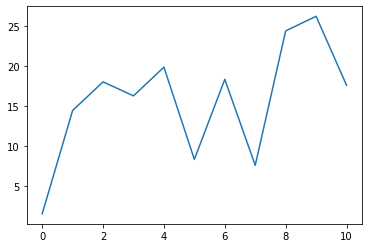

In [2883]:
#Graph of intial Fitness Values :
plt.plot(first_fitness_list)

In [2884]:
print ("Parents of Final Generation of Genetic Algorithm : ")
print (a)
print (b)

Parents of Final Generation of Genetic Algorithm : 
[0, 3]
[0, 5, 6, 7, 8, 3]


In [2885]:
print ("Intersection Point for final Cross-Over between final Parents(chromosomes):")
print(final_intersection_point)

Intersection Point for final Cross-Over between final Parents(chromosomes):
0


In [2886]:
print("Child of the Final Cross-Over between final Parents(chromosomes):")
print(child1_list)

Child of the Final Cross-Over between final Parents(chromosomes):
[0, 5, 6, 7, 8, 3]


In [2887]:
#Fitness Values of Chromosomes after Genetic algorithm :
fitness_list

[1.5661,
 14.4814,
 18.0681,
 16.3163,
 19.903,
 8.3797,
 18.3812,
 7.6376,
 24.4292,
 12.162500000000001,
 17.6391]

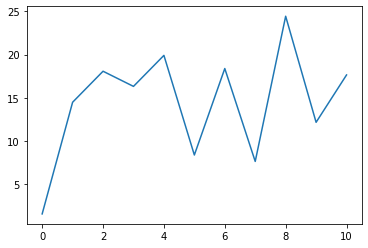

In [2888]:
#Graph of Fitness Values of Chromosomes  after Genetic Algorithm :
plt.plot(fitness_list)

In [2889]:
min_fitness_value = min(fitness_list)
min_index_of_fintess = fitness_list.index(min_fitness_value)

print("THE BEST FIT OR OPTIMAL PATH/CHROMOSOME AFTER APPLYING GENETIC ALGORITHM IS :")
distancegraph.paths[min_index_of_fintess]

THE BEST FIT OR OPTIMAL PATH/CHROMOSOME AFTER APPLYING GENETIC ALGORITHM IS :


[0, 3]

In [2890]:
#PERFORMING MUTATION :

mutation_index = Calculate_max_fitness(fitness_list)
unmutated_chromosome = distancegraph.paths[mutation_index]
distancegraph.paths[mutation_index] = mutation(unmutated_chromosome)

# Population of Mutated Chromosomes after performing Mutation :
print ("Population of Paths/Chromosomes after performing Mutation :")
fitness_list_after_mutation = Calculate_fitness(distancegraph_list)
distancegraph.paths

Population of Paths/Chromosomes after performing Mutation :


[[0, 3],
 [0, 5, 1, 9, 7, 6, 3],
 [0, 5, 1, 9, 7, 8, 3],
 [0, 5, 1, 10, 9, 7, 6, 3],
 [0, 5, 1, 10, 9, 7, 8, 3],
 [0, 5, 6, 3],
 [0, 5, 6, 7, 8, 3],
 [0, 6, 3],
 [0, 8, 5, 1, 9, 7, 8, 3],
 [0, 3, 7, 8, 3],
 [0, 6, 7, 8, 3]]

In [2891]:
#Fitness Values of Chromosomes after Performing mutation and genetic alogrithm:
fitness_list_after_mutation

[1.5661,
 14.4814,
 18.0681,
 16.3163,
 19.903,
 8.3797,
 18.3812,
 7.6376,
 17.0423,
 12.162500000000001,
 17.6391]

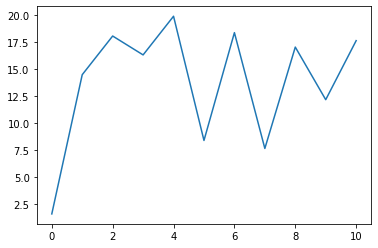

In [2892]:
#Graph of fitness list after Mutaion and genetic algorithm :

plt.plot(fitness_list_after_mutation)
